<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


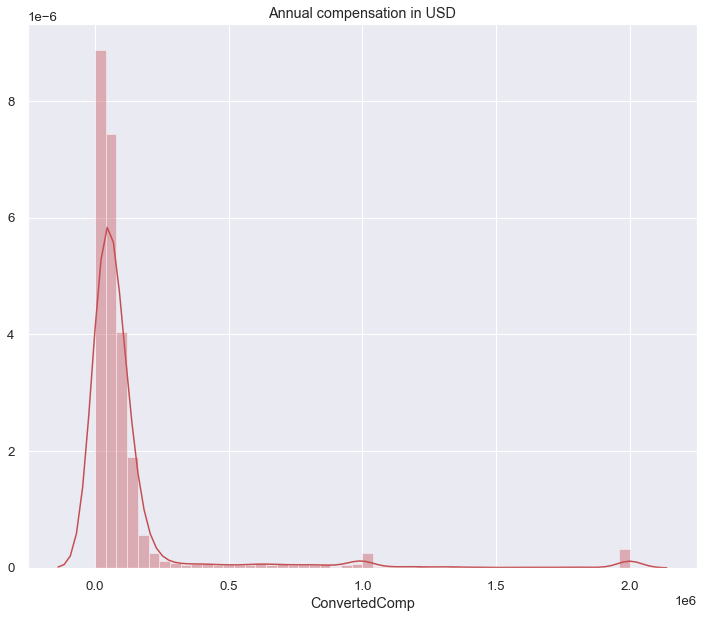

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#using distplot (we can apply hist=False not to show histogram)
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['ConvertedComp'], color="r")

plt.title('Annual compensation in USD')
plt
plt.show()
plt.close()

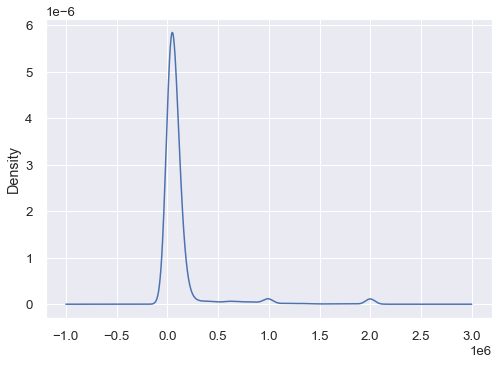

In [30]:
#  kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF)
s = df['ConvertedComp']
ax = s.plot.kde()

Plot the histogram for the column `ConvertedComp`.


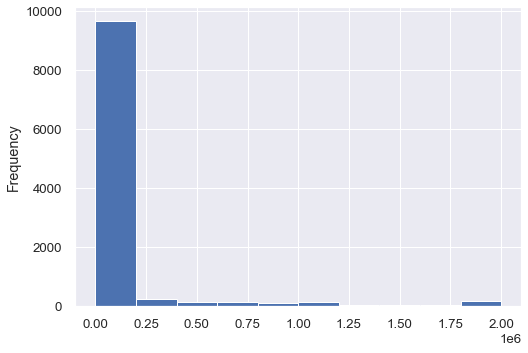

In [32]:
# your code goes here
ax = df['ConvertedComp'].plot.hist()

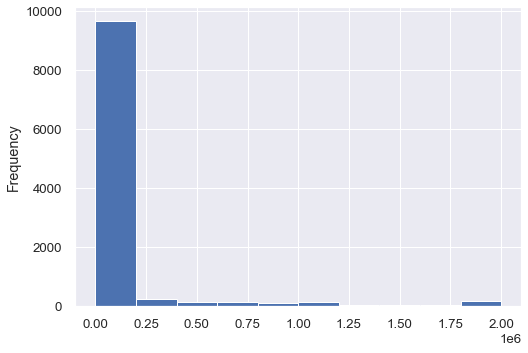

In [33]:
df['ConvertedComp'].plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [39]:
print(df['ConvertedComp'].median())
print(df['ConvertedComp'].describe())

57745.0
       ConvertedComp
count   1.058200e+04
mean    1.315967e+05
std     2.947865e+05
min     0.000000e+00
25%     2.686800e+04
50%     5.774500e+04
75%     1.000000e+05
max     2.000000e+06


How many responders identified themselves only as a **Man**?


In [41]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [43]:
# your code goes here
wdf= df.loc[df['Gender']=='Woman']
wdf['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [45]:
# your code goes here
df['Age'].describe().to_frame()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


<class 'numpy.ndarray'>


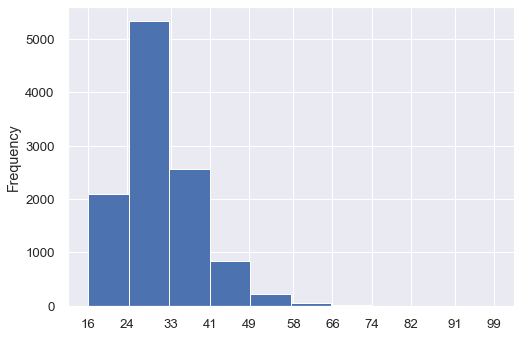

In [65]:
age = df['Age'].dropna()
count, bin_edges = np.histogram(age)
#bin_edges= [np.round(x) for x in bin_edges]
bin_edges = np.round(bin_edges)
df['Age'].plot(kind = 'hist', xticks = bin_edges)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


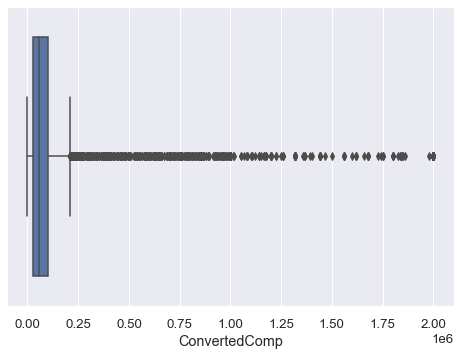

In [66]:
# your code goes here
sns.boxplot(x="ConvertedComp", data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [76]:
data = df['ConvertedComp']

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
IQR

26868.0 100000.0


73132.0

Find out the upper and lower bounds.


In [78]:
# your code goes here
L = Q1 - 1.5 * IQR 
U = Q3 + 1.5 * IQR
print(L, U)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [87]:
outl = (df["ConvertedComp"]>209698).sum()
outl

879

In [88]:
#find how many are NaN in ConvertedComp  - they will be filtered out in the new df1 below
print(df.shape)
df["ConvertedComp"].isnull().sum()

(11398, 85)


816

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [94]:
df1 = df[df["ConvertedComp"]<209698]
print(df1.shape)
df1["ConvertedComp"].describe()

(9703, 85)


count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

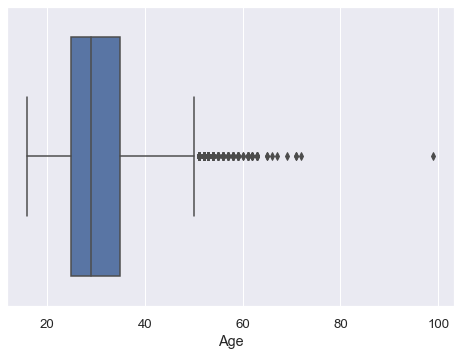

In [96]:
sns.boxplot(df['Age'])

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [93]:
# your code goes here
df1.corr()['Age'].sort_values().to_frame()

,Age
CodeRevHrs,-0.012878
Respondent,0.002180
CompTotal,0.006337
WorkWeekHrs,0.032032
ConvertedComp,0.401821
Age,1.000000


In [90]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
